In [22]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# IBL stuff
from ibl_pipeline import behavior, acquisition 
sns.set()

In [15]:
# temperature etc at the start of each session
data = ((acquisition.Session() * behavior.AmbientSensorData() * behavior.Settings()) & 'trial_id = 1').proj(
    'session_lab', 'pybpod_board', 'temperature_c', 'air_pressure_mb', 'relative_humidity')
data = data.fetch(format='frame').reset_index()

In [17]:
data.describe()

,trial_id,temperature_c,air_pressure_mb,relative_humidity
count,17066.0,17066.000000,17066.000000,17065.00000
mean,1.0,27.562683,1012.805549,35.25369
std,0.0,1.901798,25.223281,10.94934
min,1.0,0.000000,0.000000,0.00000
25%,1.0,26.760000,1007.360000,27.99610
50%,1.0,27.850000,1013.530000,36.75000
75%,1.0,28.700000,1019.530000,42.90530
max,1.0,33.620000,1058.520000,79.29390


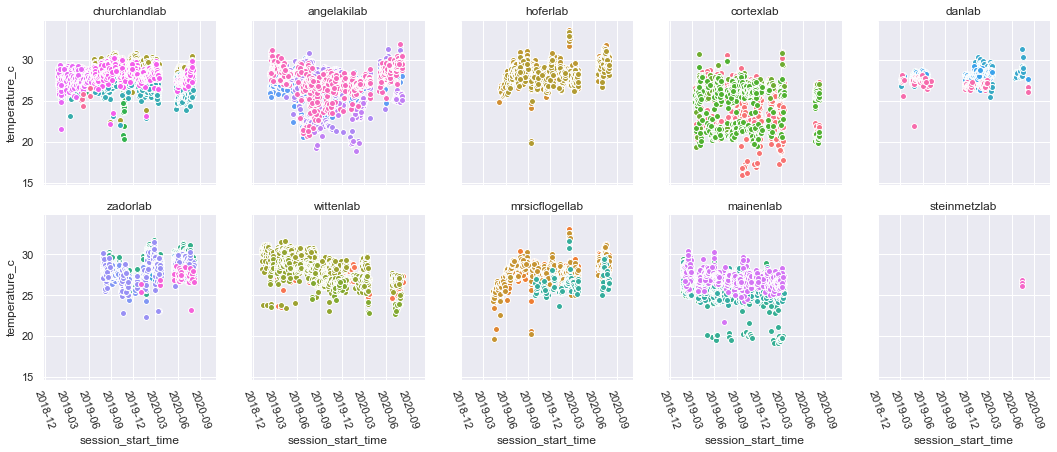

In [32]:
# order so that geographically close pairs can be easily inspected side by side
col_order = ['churchlandlab', 'angelakilab', 'hoferlab', 'cortexlab', 'danlab', 
            'zadorlab', 'wittenlab', 'mrsicflogellab', 'mainenlab', 'steinmetzlab']
g = sns.FacetGrid(data.loc[data.temperature_c > 0., :], # ignore 0 celsius
                  col="session_lab", hue='pybpod_board', col_wrap=5, col_order=col_order)
g = g.map(plt.scatter, "session_start_time", "temperature_c", edgecolor="w").set_titles("{col_name}")

for ax in g.axes.flatten():
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    for item in ax.get_xticklabels():
        item.set_rotation(-70)
        

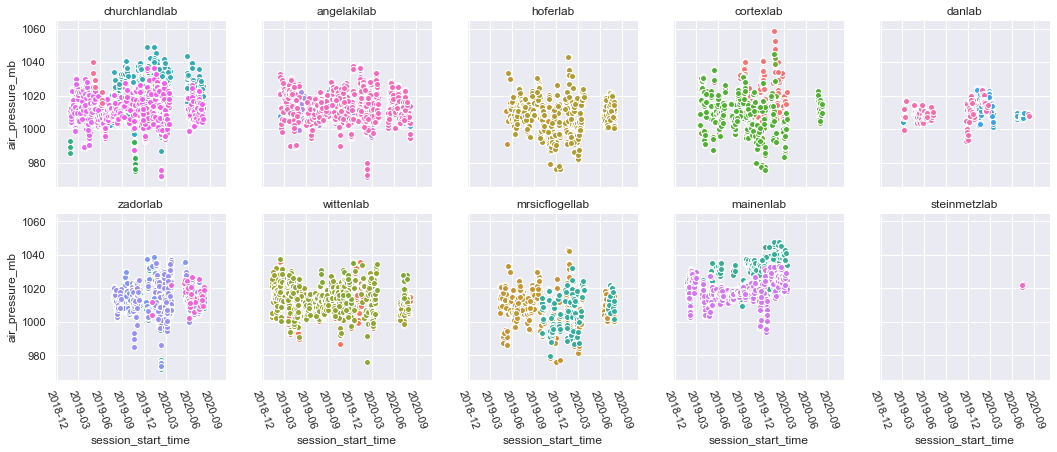

In [33]:
g = sns.FacetGrid(data.loc[data.temperature_c > 0., :], # ignore 0 celsius
                  col="session_lab", hue='pybpod_board', col_wrap=5, col_order=col_order)
g = g.map(plt.scatter, "session_start_time", "air_pressure_mb", edgecolor="w").set_titles("{col_name}")

for ax in g.axes.flatten():
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    for item in ax.get_xticklabels():
        item.set_rotation(-70)

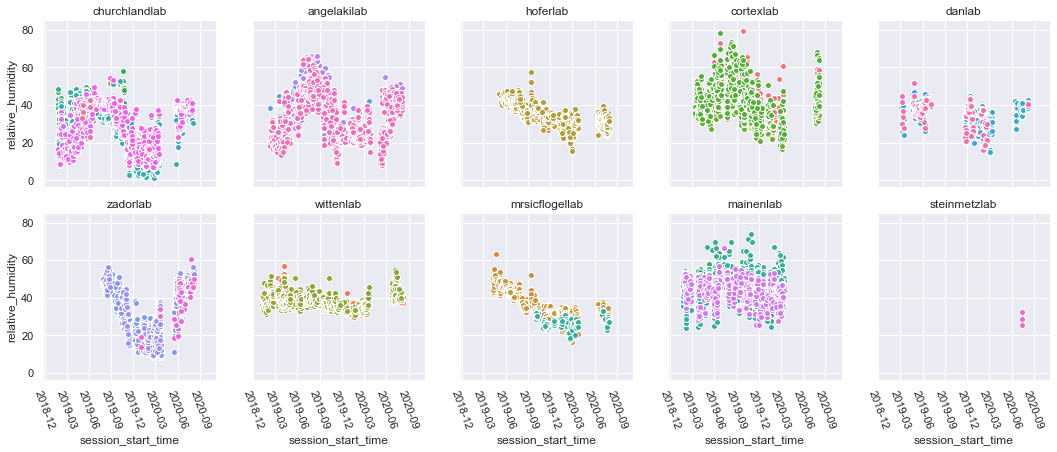

In [34]:
g = sns.FacetGrid(data.loc[data.temperature_c > 0., :], # ignore 0 celsius
                  col="session_lab", hue='pybpod_board', col_wrap=5, col_order=col_order)
g = g.map(plt.scatter, "session_start_time", "relative_humidity", edgecolor="w").set_titles("{col_name}")

for ax in g.axes.flatten():
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    for item in ax.get_xticklabels():
        item.set_rotation(-70)